In [49]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

r_sense = 1.09
cols = ["Half-Wave", "Full-Wave"]
rows = ["No load", "2kOhm load", "1kOhm load"]
data = [[pd.read_csv(f"scope_{col * 3 + row}.csv", skiprows=1).dropna() for row in range(3)] for col in range(2)]
t = np.array([[data[col][row]["second"].to_numpy() * 1000 for row in range(3)] for col in range(2)])
i = np.array([[data[col][row]["Volt"].to_numpy() for row in range(3)] for col in range(2)]) / r_sense
v = np.array([[data[col][row]["Volt.1"].to_numpy() for row in range(3)] for col in range(2)])

v_dc = np.mean(v, axis=-1)
i_peak = np.max(i, axis=-1)

v_rms = np.sqrt(np.mean(v**2, axis=-1))
i_rms = np.sqrt(np.mean(i**2, axis=-1))
apparent_power = v_rms * i_rms
real_power = np.mean(v * i, axis=-1)
power_factor = real_power / apparent_power

v_ripple = np.max(v, axis=-1) - np.min(v, axis=-1)

load_regulation = (v_dc[:, 0] - v_dc[:, 2]) / v_dc[:, 2] * 100

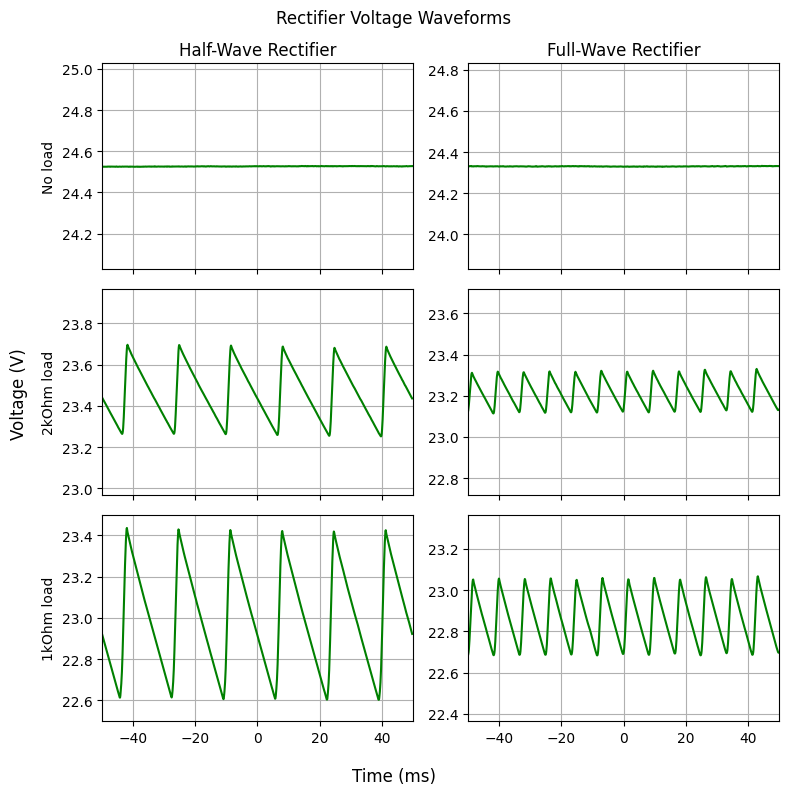

In [50]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True)
for row in range(3):
    for col in range(2):

        axs[row, col].plot(t[col, row, :], v[col, row, :], 'g-')
        axs[row, col].set_ylim(v_dc[col, row] - 0.5, v_dc[col, row] + 0.5)
        axs[row, col].set_xlim(-50, 50)
        axs[row, col].grid(True)

for row in range(3):
    axs[row, 0].set_ylabel(f"{rows[row]}")
for col in range(2):
    axs[0, col].set_title(f"{cols[col]} Rectifier")

fig.suptitle("Rectifier Voltage Waveforms")
fig.supylabel("Voltage (V)")
fig.supxlabel("Time (ms)")
fig.tight_layout()

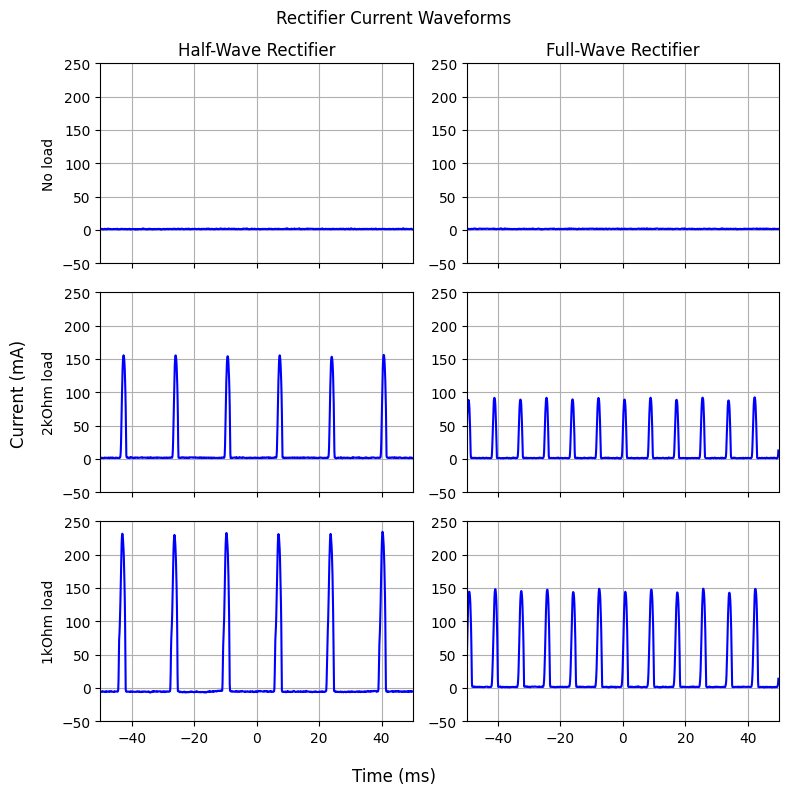

In [51]:
fig, axs = plt.subplots(3, 2, figsize=(8, 8), sharex=True)
for row in range(3):
    for col in range(2):

        axs[row, col].plot(t[col, row, :], i[col, row, :] * 1000, 'b-')
        axs[row, col].set_ylim(-50, 250)
        axs[row, col].set_xlim(-50, 50)
        axs[row, col].grid(True)

for row in range(3):
    axs[row, 0].set_ylabel(f"{rows[row]}")
for col in range(2):
    axs[0, col].set_title(f"{cols[col]} Rectifier")

fig.suptitle("Rectifier Current Waveforms")
fig.supylabel("Current (mA)")
fig.supxlabel("Time (ms)")
fig.tight_layout()

In [52]:
# Assemble a CSV file containing V_rms, I_rms, real power, apparent power, and power factor
results = []
for col in range(2):
    for row in range(3):
        results.append({
            "Rectifier": cols[col],
            "Load": rows[row],
            "V_dc (V)": v_dc[col, row],
            "I_peak (A)": i_peak[col, row],
            "V_rms (V)": v_rms[col, row],
            "I_rms (A)": i_rms[col, row],
            "Real Power (W)": real_power[col, row],
            "Apparent Power (VA)": apparent_power[col, row],
            "Power Factor": power_factor[col, row]
        })

df = pd.DataFrame(results)
df.to_csv("results.csv", index=False)